## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
x_train.shape

(50000, 3072)

改為1類

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    """Code Here
    建立你的神經網路
    """    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
EPOCHS = 50
LEARNUNG_RATE = 1e-3
MOMUNTUM = 0.95
BATCH_SIZE = 250

In [7]:
from keras.callbacks import ModelCheckpoint
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
checkpoint = ModelCheckpoint('model.h5' ,## save
                             monitor='val_loss',
                             verbose=1 , ## 印出過程)
                             save_best_only= True )## 儲存最好的checkpoint
                             

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

optimizer = keras.optimizers.SGD(lr = LEARNUNG_RATE,momentum=MOMUNTUM,nesterov=True)
model.compile(optimizer = optimizer ,loss ="categorical_crossentropy" , metrics =["accuracy"] )

model.fit(x_train,y_train,
          epochs = EPOCHS ,
          batch_size = BATCH_SIZE, 
          verbose = 1,
        validation_data=(x_test,y_test),
        shuffle = True,
         callbacks = [checkpoint])


# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc  = model.history.history["acc"]
valid_acc  = model.history.history["val_acc"]

exp_name_tag = "the_best_only"

results[exp_name_tag]={"train-loss" : train_loss,
                       "valid-loss" : valid_loss,
                       "train_acc"  : train_acc,
                       "valid_acc"  : valid_acc}


# Load back
model = keras.models.load_model("./model.h5")
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

50000/50000 [==============================] - 3s 66us/step - loss: 0.4441 - acc: 0.8553 - val_loss: 2.0044 - val_acc: 0.4630

Epoch 00032: val_loss did not improve from 1.43660
Epoch 33/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.4158 - acc: 0.8678 - val_loss: 1.9468 - val_acc: 0.4793

Epoch 00033: val_loss did not improve from 1.43660
Epoch 34/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.4024 - acc: 0.8709 - val_loss: 1.9646 - val_acc: 0.4700

Epoch 00034: val_loss did not improve from 1.43660
Epoch 35/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.3846 - acc: 0.8772 - val_loss: 1.9728 - val_acc: 0.4746

Epoch 00035: val_loss did not improve from 1.43660
Epoch 36/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.3659 - acc: 0.8851 - val_loss: 2.1180 - val_acc: 0.4741

Epoch 00036: val_loss did not improve from 1.43660
Epoch 37/50
50000/50000 [==============================] - 3s 

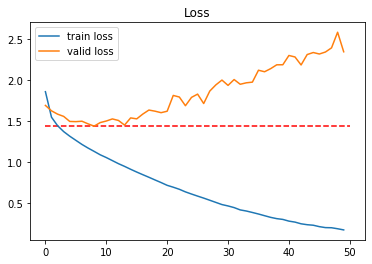

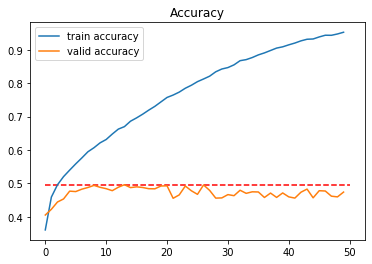

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""""
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()